In [52]:
# packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import GridSearchCV, learning_curve, validation_curve, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from matplotlib.ticker import LogLocator, LogFormatter
from time import time
seed = 903966526
clf = MLPClassifier(random_state=seed)

In [53]:
# load data
wine = fetch_ucirepo(id=109) 
X = wine.data.features 
y = wine.data.targets 
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [54]:
#learning curve
lc_size = [x / 100.0 for x in range(1, 101, 2)]
_, lc_train, lc_test = learning_curve(
    estimator= clf,
    X= X,
    y= y,
    train_sizes= lc_size,
    scoring= 'accuracy',
    n_jobs= -1
)
lc_train = np.mean(lc_train, axis=1)
lc_test = np.mean(lc_test, axis=1)

/home/eugene/miniconda3/envs/cs7641/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/eugene/miniconda3/envs/cs7641/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/eugene/miniconda3/envs/cs7641/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/eugene/miniconda3/envs/cs7641/lib/python3.8/site-packages/sklearn/neur

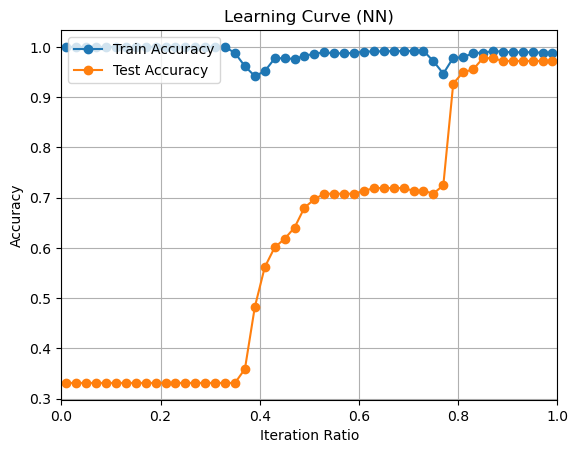

In [55]:
#learning curve graph
plt.plot(lc_size, lc_train, label='Train Accuracy', linestyle='-', marker='o')
plt.plot(lc_size, lc_test, label='Test Accuracy', linestyle='-', marker='o')
plt.xlabel('Iteration Ratio')
plt.ylabel('Accuracy')
plt.title('Learning Curve (NN)')
plt.legend(loc='upper left')
plt.xlim(0,1)
plt.grid(True)
plt.savefig('images/w_nn_learncurve.png')
plt.show()
plt.close()

In [56]:
#validation curve - solver
solver = ['lbfgs', 'sgd', 'adam']
vc_s_train, vc_s_test = validation_curve(
    estimator= clf,
    X= X,
    y= y,
    param_name= 'solver',
    param_range= solver,
    scoring= 'accuracy',
    n_jobs= -1
)
vc_s_train = np.mean(vc_s_train, axis=1)
vc_s_test = np.mean(vc_s_test, axis=1)

/home/eugene/miniconda3/envs/cs7641/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/eugene/miniconda3/envs/cs7641/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/eugene/miniconda3/envs/cs7641/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/eugene/miniconda3/envs/cs7641/lib/python3.8/site-packages/sklearn/neur

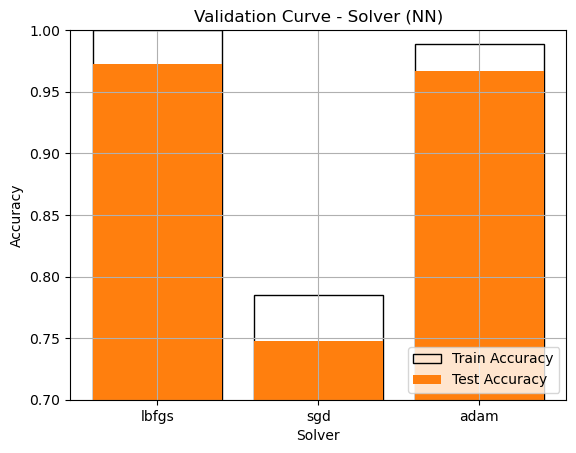

In [57]:
#validation curve - solver graph
plt.bar(solver, vc_s_train, label= 'Train Accuracy', fill=False)
plt.bar(solver, vc_s_test, label= 'Test Accuracy')
plt.xlabel('Solver')
plt.ylabel('Accuracy')
plt.title('Validation Curve - Solver (NN)')
plt.legend(loc='lower right')
plt.grid(True)
plt.ylim(0.7, 1)
plt.savefig('images/w_nn_valcurve_solver.png')
plt.show()
plt.close()

In [58]:
print(f"Peak Test Accuracy of {np.max(vc_s_test):.2f} using {solver[np.argmax(vc_s_test)]} solver")

Peak Test Accuracy of 0.97 using lbfgs solver


In [59]:
#validation curve - alpha
alpha = np.logspace(-6, 6, num=50)
vc_a_train, vc_a_test = validation_curve(
    estimator= clf,
    X= X,
    y= y,
    param_name= 'alpha',
    param_range= alpha,
    scoring= 'accuracy',
    n_jobs= -1
)
vc_a_train = np.mean(vc_a_train, axis=1)
vc_a_test = np.mean(vc_a_test, axis=1)

/home/eugene/miniconda3/envs/cs7641/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/eugene/miniconda3/envs/cs7641/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/eugene/miniconda3/envs/cs7641/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/eugene/miniconda3/envs/cs7641/lib/python3.8/site-packages/sklearn/neur

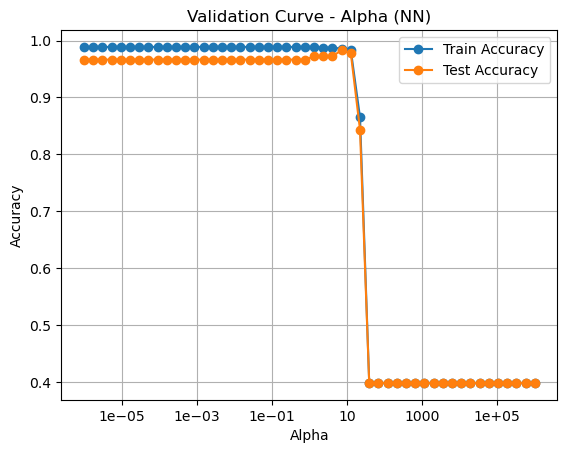

In [60]:
#validation curve - alpha graph
plt.plot(alpha, vc_a_train, label= 'Train Accuracy', linestyle='-', marker='o')
plt.plot(alpha, vc_a_test, label= 'Test Accuracy', linestyle='-', marker='o')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.title('Validation Curve - Alpha (NN)')
plt.legend(loc='upper right')
plt.grid(True)
plt.xscale('log')
plt.gca().xaxis.set_major_locator(LogLocator(base=10.0, numticks=13))
plt.gca().xaxis.set_major_formatter(LogFormatter(base=10.0, labelOnlyBase=True))
plt.savefig('images/w_nn_valcurve_alpha.png')
plt.show()
plt.close()

In [61]:
print(f"Peak Test Accuracy of {np.max(vc_a_test):.2f} @ {alpha[np.argmax(vc_a_test)]} alpha")

Peak Test Accuracy of 0.98 @ 7.196856730011514 alpha


In [62]:
# parameter optimization
param = {
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': np.logspace(-6, 6, num=50),
}
grid = GridSearchCV(
    estimator= clf,
    param_grid= param, 
    scoring= 'accuracy', 
    n_jobs=-1
)
grid.fit(X_train, y_train)
optimal = grid.best_estimator_
test_score = optimal.score(X_test, y_test)

/home/eugene/miniconda3/envs/cs7641/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/eugene/miniconda3/envs/cs7641/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/eugene/miniconda3/envs/cs7641/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/eugene/miniconda3/envs/cs7641/lib/python3.8/site-packages/sklearn/neur

In [63]:
print(f'Best Parameters: {grid.best_params_}')
print(f'Best Cross-validation score: {grid.best_score_}')
print(f'Test Accuracy: {test_score}')

Best Parameters: {'alpha': 0.0026826957952797246, 'solver': 'lbfgs'}
Best Cross-validation score: 0.9788177339901478
Test Accuracy: 1.0


In [64]:
start = time()
final = MLPClassifier(**grid.best_params_)
final.fit(X_train, y_train)
pred = final.predict(X_test)
end = time()
duration = end - start
print(f'Train duration: {duration}s')

Train duration: 0.013365745544433594s


/home/eugene/miniconda3/envs/cs7641/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
